# Ablation of Discrete Encodings (Figure 4)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import utils

In [2]:
plt.rcParams["font.size"] = 22
plt.rcParams["legend.fontsize"] = 22

In [3]:
ENCODINGS = {
    "codes": "Codes (ours)",
    "indices": "Label",
    "one-hot": "One-hot",
}
PALETTE = {
    "Codes (ours)": "#984ea3",
    "Label": "#377eb8",
    "One-hot": "#e41a1c",
}
main_envs = [
    "dog-run",
    "humanoid-walk",
    "dog-run",
    "humanoid-walk",
]

In [4]:
df = pd.read_csv("../data/ablations/discrete-encodings.csv")

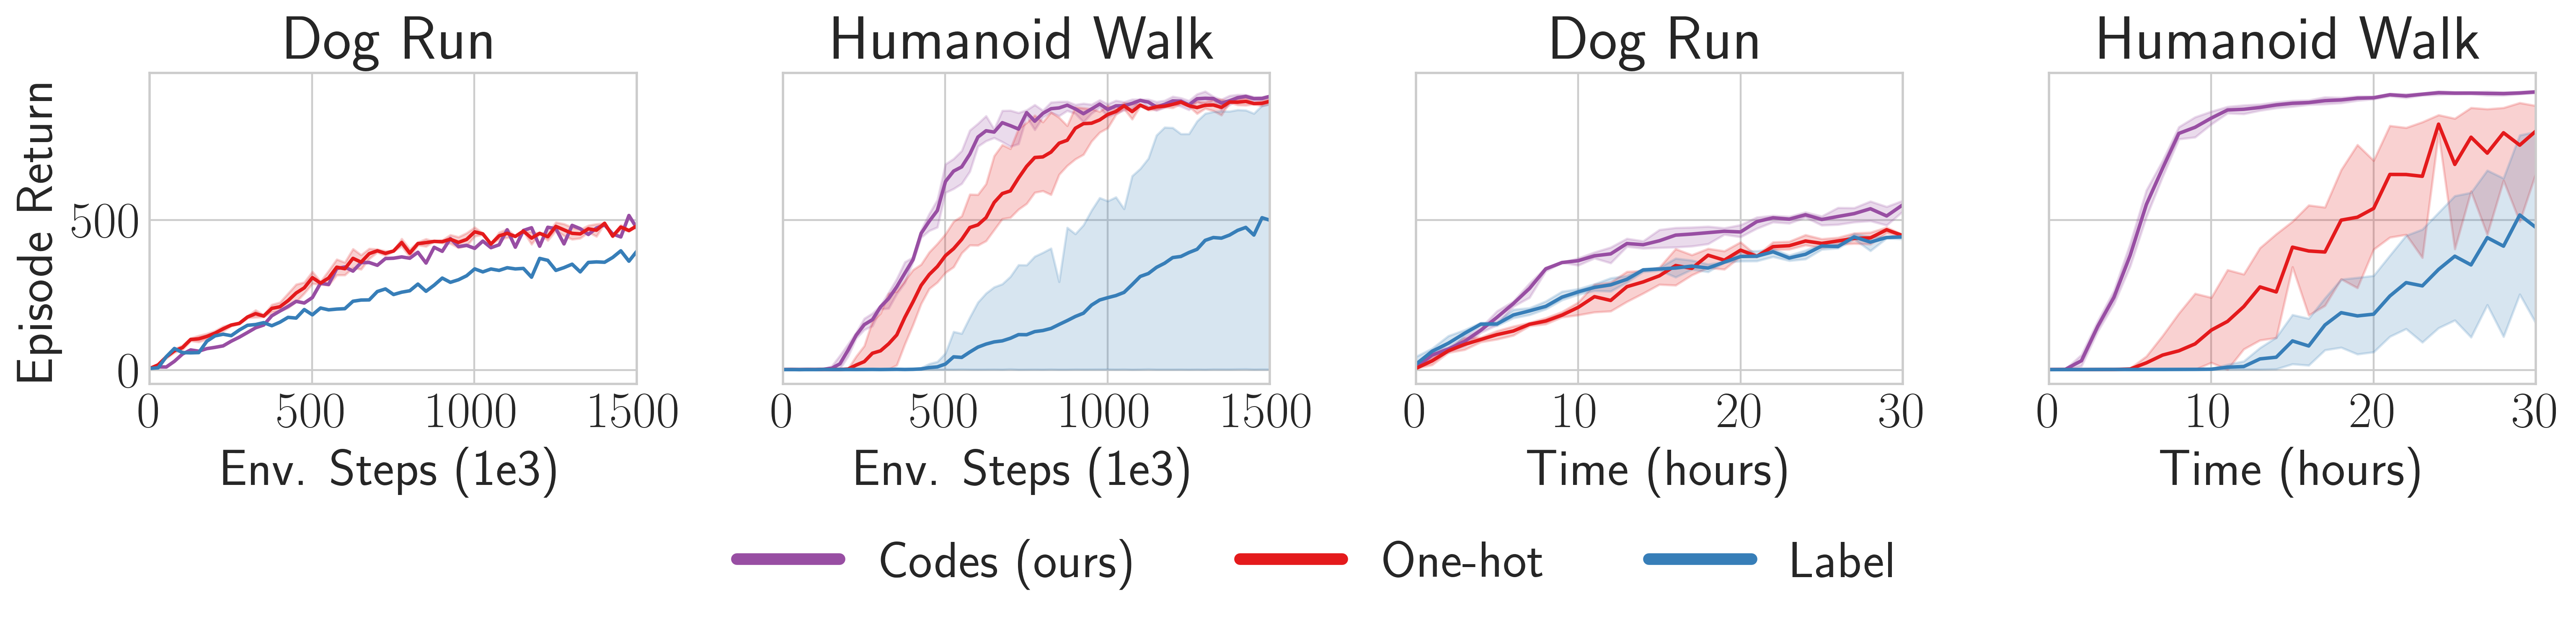

In [5]:
def plot_discrete_encodings_comparison(df, key: str = "episode_reward"):
    # Only keep specified tasks
    df = df[df["env"].isin(main_envs)]
    
    ncol = 4
    nrow = 1
    fig, axs = plt.subplots(
        nrow,
        ncol,
        figsize=(4 * ncol, 3.5 * nrow),
        sharex="col",
        sharey="row",
    )

    # Convert time to hours
    df.loc[:, "time"] = df["time"] // 3600

    # Convert env step to (1e3)
    df.loc[:, "env_step"] = df["env_step"] // 1000

    df.loc[:, "discrete_encoding_type"] = df["discrete_encoding_type"].replace(ENCODINGS)

    for idx, env in enumerate(main_envs):
        data = df[df["env"] == env]
        col = idx % ncol
        ax = axs[col]
        legend = idx == len(main_envs) - 1

        if idx < 2:
            x = "env_step"
        else:
            x = "time"
        g = sns.lineplot(
            x=x,
            y=key,
            data=data,
            errorbar=("ci", 95),
            hue="discrete_encoding_type",
            # hue_order=np.sort(data.discrete_encoding_type.unique()),
            palette=PALETTE,
            legend="auto" if legend else False,
            ax=ax,
        )

        ax.set_title(" ".join([ele.capitalize() for ele in env.split("-")]))
        if x == "time":
            ax.set_xlabel("Time (hours)")
            g.set(xlim=(0, 30))
        else:
            ax.set_xlabel("Env. Steps (1e3)")
            g.set(xlim=(0, 1500))

    axs[0].set_ylabel(utils.YLABELS[key])

    l = axs[-1].legend(
        loc="upper center",
        bbox_to_anchor=(-1.5, -0.35),
        fancybox=False,
        shadow=False,
        ncol=len(df.discrete_encoding_type.unique()),
    )
    for line in l.get_lines():
        line.set_linewidth(5.0)
    fig.subplots_adjust(
        bottom=0.35,
        hspace=0.3,
        wspace=0.3,
        left=0.08,
        right=0.97,
        top=0.88,
    )
    plt.savefig("./figs/discrete-encodings-ablation-time-and-env-step.pdf")

plot_discrete_encodings_comparison(df)